# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pyomo
from pyomo.environ import *
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [3]:
import sys

if 'google.colab' in sys.modules:
    %pip install pyomo >/dev/null 2>/dev/null
    %pip install highspy >/dev/null 2>/dev/null

solver = 'appsi_highs'

import pyomo.environ as pyo
SOLVER = pyo.SolverFactory(solver)

assert SOLVER.available(), f"Solver {solver} is not available."

In [4]:
import pyomo.environ as pyo

#Pyomo Examples

Reference: [1] https://mobook.github.io/MO-book/notebooks/01/01.00.html

## Example 1

In [ ]:
# create model with optional problem title
model = pyo.ConcreteModel("Production Planning: Version 1")

In [ ]:
# display model
model.display()

Model 'Production Planning: Version 1'

  Variables:
    None

  Objectives:
    None

  Constraints:
    None


In [ ]:
# create decision variables
model.x_M = pyo.Var(bounds=(0, None))
model.x_A = pyo.Var(bounds=(0, 80))
model.x_B = pyo.Var(bounds=(0, 100))

model.y_U = pyo.Var(bounds=(0, 40))
model.y_V = pyo.Var(bounds=(0, None))

# display updated model
model.display()

Model 'Production Planning: Version 1'

  Variables:
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    80 : False :  True :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :   100 : False :  True :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    40 : False :  True :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals

  Objectives:
    None

  Constraints:
    None


In [ ]:
# create expressions
model.revenue = 270 * model.y_U + 210 * model.y_V
model.cost = 10 * model.x_M + 50 * model.x_A + 40 * model.x_B

# expressions can be printed
print(model.revenue)
print(model.cost)

270*y_U + 210*y_V
10*x_M + 50*x_A + 40*x_B


In [ ]:
model.profit = pyo.Objective(expr=model.revenue - model.cost, sense=pyo.maximize)

In [ ]:
@model.Objective(sense=pyo.maximize)
def profit(m):
    return m.revenue - m.cost

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
model.raw_materials = pyo.Constraint(expr = 10 * model.y_U + 9 * model.y_V <= model.x_M)
model.labor_A = pyo.Constraint(expr = 1 * model.y_U + 1 * model.y_V <= model.x_A)
model.labor_B = pyo.Constraint(expr = 2 * model.y_U + 1 * model.y_V <= model.x_B)

In [ ]:
@model.Constraint()
def raw_materials(m):
    return 10 * m.y_U + 9 * m.y_V <= m.x_M


@model.Constraint()
def labor_A(m):
    return 1 * m.y_U + 1 * m.y_V <= m.x_A


@model.Constraint()
def labor_B(m):
    return 2 * m.y_U + 1 * m.y_V <= m.x_B


model.pprint()

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


5 Var Declarations
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    80 : False :  True :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :   100 : False :  True :  Reals
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :    40 : False :  True :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True :  Reals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 270*y_U + 210*y_V - (10*x_M + 50*x_A + 40*x_B)

3 Constraint Dec

In [ ]:
results = SOLVER.solve(model, tee=True)

Running HiGHS 1.9.0 (git hash: fa40bdf): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+01]
  Cost   [1e+01, 3e+02]
  Bound  [4e+01, 1e+02]
  RHS    [0e+00, 0e+00]
Presolving model
2 rows, 4 cols, 6 nonzeros  0s
2 rows, 4 cols, 6 nonzeros  0s
Presolve : Reductions: rows 2(-1); columns 4(-1); elements 6(-3)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.0999953995e+02 Ph1: 2(4); Du: 3(210) 0s
          3    -2.6000000000e+03 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 3
Objective value     :  2.6000000000e+03
Relative P-D gap    :  0.0000000000e+00
HiGHS run time      :          0.00


In [ ]:
# display the whole model
model.pprint()

5 Var Declarations
    x_A : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  80.0 :    80 : False : False :  Reals
    x_B : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 100.0 :   100 : False : False :  Reals
    x_M : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 : 740.0 :  None : False : False :  Reals
    y_U : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  20.0 :    40 : False : False :  Reals
    y_V : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  60.0 :  None : False : False :  Reals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 270*y_U + 210*y_V - (10*x_M + 50*x_A + 40*x_B)

3 Constraint Dec

In [ ]:
# display a component of the model
model.profit.pprint()

profit : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : maximize : 270*y_U + 210*y_V - (10*x_M + 50*x_A + 40*x_B)


In [ ]:
pyo.value(model.profit)

2600.0

In [ ]:
print(f" Profit = {pyo.value(model.profit): 9.2f}")
print(f"Revenue = {pyo.value(model.revenue): 9.2f}")
print(f"   Cost = {pyo.value(model.cost): 9.2f}")

 Profit =   2600.00
Revenue =  18000.00
   Cost =  15400.00


In [ ]:
print("x_A =", model.x_A())
print("x_B =", model.x_B())
print("x_M =", model.x_M())

x_A = 80.0
x_B = 100.0
x_M = 740.0


In [ ]:
import pandas as pd

# create pandas series for production and raw materials
production = pd.Series(
    {
        "U": pyo.value(model.y_U),
        "V": pyo.value(model.y_V),
    }
)

raw_materials = pd.Series(
    {
        "A": pyo.value(model.x_A),
        "B": pyo.value(model.x_B),
        "M": pyo.value(model.x_M),
    }
)

# display pandas series
display(production)
display(raw_materials)

,0
U,20.0
V,60.0


,0
A,80.0
B,100.0
M,740.0


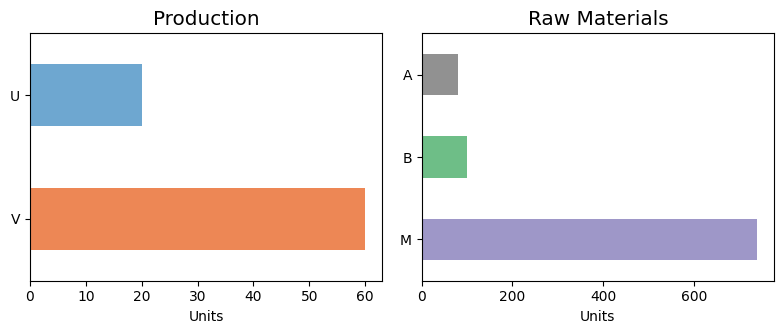

In [ ]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots and configure global settings
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))
plt.rcParams["font.size"] = 12
colors = plt.cm.tab20c.colors
color_sets = [[colors[0], colors[4]], [colors[16], colors[8], colors[12]]]
datasets = [production, raw_materials]
titles = ["Production", "Raw Materials"]

# Plot data on subplots
for i, (data, title, color_set) in enumerate(zip(datasets, titles, color_sets)):
    data.plot(ax=ax[i], kind="barh", title=title, alpha=0.7, color=color_set)
    ax[i].set_xlabel("Units")
    ax[i].invert_yaxis()
plt.tight_layout()
plt.show()

## Example 2

In [ ]:
products = {
    "U": {"price": 270, "demand": 40},
    "V": {"price": 210, "demand": None},
}

# print data
for product, attributes in products.items():
    for attribute, value in attributes.items():
        print(f"{product} {attribute:10s} {value}")

U price      270
U demand     40
V price      210
V demand     None


In [ ]:
resources = {
    "M": {"price": 10, "available": None},
    "labor A": {"price": 50, "available": 80},
    "labor B": {"price": 40, "available": 100},
}

for resource, attributes in resources.items():
    for attribute, value in attributes.items():
        print(f"{resource:8s} {attribute:10s} {value}")

M        price      10
M        available  None
labor A  price      50
labor A  available  80
labor B  price      40
labor B  available  100


In [ ]:
processes = {
    "U": {"M": 10, "labor A": 1, "labor B": 2},
    "V": {"M": 9, "labor A": 1, "labor B": 1},
}

for product, process in processes.items():
    for resource, value in process.items():
        print(f"{product:4s} {resource:10s} {value}")

U    M          10
U    labor A    1
U    labor B    2
V    M          9
V    labor A    1
V    labor B    1


In [ ]:
model = pyo.ConcreteModel()

In [ ]:
model.PRODUCTS = pyo.Set(initialize=products.keys())
model.RESOURCES = pyo.Set(initialize=resources.keys())

In [ ]:
# parameter for bounds
@model.Param(model.PRODUCTS, domain=pyo.Any)
def demand(model, product):
    return products[product]["demand"]


@model.Param(model.RESOURCES, domain=pyo.Any)
def available(model, resource):
    return resources[resource]["available"]


# parameter with price coefficients
@model.Param(model.PRODUCTS)
def cp(model, product):
    return products[product]["price"]


@model.Param(model.RESOURCES)
def cr(model, resource):
    return resources[resource]["price"]


# process parameters: a[r,p]
@model.Param(model.RESOURCES, model.PRODUCTS)
def a(model, resource, product):
    return processes[product][resource]

In [ ]:
model.x = pyo.Var(
    model.RESOURCES, bounds=lambda model, resource: (0, model.available[resource])
)
model.y = pyo.Var(
    model.PRODUCTS, bounds=lambda model, product: (0, model.demand[product])
)

In [ ]:
model.revenue = pyo.quicksum(
    model.cp[product] * model.y[product] for product in model.PRODUCTS
)
model.cost = pyo.quicksum(
    model.cr[resource] * model.x[resource] for resource in model.RESOURCES
)


# create objective
@model.Objective(sense=pyo.maximize)
def profit(model):
    return model.revenue - model.cost

In [ ]:
# create indexed constraint
@model.Constraint(model.RESOURCES)
def materials_used(model, resource):
    return (
        pyo.quicksum(
            model.a[resource, product] * model.y[product] for product in model.PRODUCTS
        )
        <= model.x[resource]
    )

In [ ]:
model.pprint()

# solve
SOLVER.solve(model)

# create a solution report
print(f"Profit = {pyo.value(model.profit)}")

print("\nProduction Report")
for product in model.PRODUCTS:
    print(f" {product}  produced =  {pyo.value(model.y[product])}")

print("\nResource Report")
for resource in model.RESOURCES:
    print(f" {resource} consumed = {pyo.value(model.x[resource])}")

2 Set Declarations
    PRODUCTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'U', 'V'}
    RESOURCES : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'M', 'labor A', 'labor B'}

5 Param Declarations
    a : Size=6, Index=RESOURCES*PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key              : Value
              ('M', 'U') :    10
              ('M', 'V') :     9
        ('labor A', 'U') :     1
        ('labor A', 'V') :     1
        ('labor B', 'U') :     2
        ('labor B', 'V') :     1
    available : Size=3, Index=RESOURCES, Domain=Any, Default=None, Mutable=False
        Key     : Value
              M :  None
        labor A :    80
        labor B :   100
    cp : Size=2, Index=PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key : Value
          U :   270
          V :   210
    cr : Size=3, I

### For Experts

In [ ]:
class ProductionModel(pyo.ConcreteModel):
    """
    A class representing a production model using Pyomo.
    """

    def __init__(self, products, resources, processes):
        """
        Initialize ProductionModel as an instance of a ConcreteModel.

        :param products: A dictionary containing product information.
        :param resources: A dictionary containing resource information.
        :param processes: A dictionary containing process information.
        """
        super().__init__("Production Model")

        # save data in the model instance
        self.products = products
        self.resources = resources
        self.processes = processes

        # flag to monitor solution status
        self.solved = False

    def build_model(self):
        """
        Build the optimization model.
        """
        # access the model
        model = self.model()

        # create sets to index variables and constraints
        model.PRODUCTS = self.products.keys()
        model.RESOURCES = self.resources.keys()

        # decision variables
        model.x = pyo.Var(
            model.RESOURCES,
            bounds=lambda model, resource: (0, self.resources[resource]["available"]),
        )
        model.y = pyo.Var(
            model.PRODUCTS,
            bounds=lambda model, product: (0, self.products[product]["demand"]),
        )

        # use expressions to break up complex objectives
        model.revenue = pyo.quicksum(
            self.products[product]["price"] * model.y[product]
            for product in model.products
        )
        model.cost = pyo.quicksum(
            self.resources[resource]["price"] * model.x[resource]
            for resource in model.resources
        )

        # create objective
        @model.Objective(sense=pyo.maximize)
        def profit(model):
            return model.revenue - model.cost

        # create indexed constraint
        @model.Constraint(model.RESOURCES)
        def materials_used(model, resource):
            return (
                pyo.quicksum(
                    self.processes[product][resource] * model.y[product]
                    for product in model.PRODUCTS
                )
                <= model.x[resource]
            )

    def solve(self, solver=SOLVER):
        """
        Buildthe model, if necessary, then solve the optimization model.
        """
        self.build_model()
        solver.solve(self)
        self.solved = True

    def report(self):
        """
        Solve, if necessary, then report the model solution.
        """
        if not self.solved:
            self.solve(SOLVER)
        print(f"Profit = {pyo.value(self.profit)}")
        print("\nProduction Report")
        for product in m.PRODUCTS:
            print(f" {product}  produced =  {pyo.value(self.y[product])}")
        print("\nResource Report")
        for resource in m.RESOURCES:
            print(f" {resource} consumed = {pyo.value(self.x[resource])}")


m = ProductionModel(products, resources, processes)
m.report()

Profit = 2600.0

Production Report
 U  produced =  20.0
 V  produced =  60.0

Resource Report
 M consumed = 740.0
 labor A consumed = 80.0
 labor B consumed = 100.0


#Weighted-Sum Method

In [ ]:
# create model with optional problem title
model = pyo.ConcreteModel("Production Planning")

In [ ]:
# display model
model.display()

Model Production Planning

  Variables:
    None

  Objectives:
    None

  Constraints:
    None


In [ ]:
products = {
    "U": {"price": 270, "demand": 40, "carbon":50},
    "V": {"price": 210, "demand": None, "carbon":60},
}

# print data
for product, attributes in products.items():
    for attribute, value in attributes.items():
        print(f"{product} {attribute:10s} {value}")

U price      270
U demand     40
U carbon     50
V price      210
V demand     None
V carbon     60


In [ ]:
resources = {
    "M": {"price": 10, "available": None},
    "labor A": {"price": 50, "available": 80},
    "labor B": {"price": 40, "available": 100},
}

for resource, attributes in resources.items():
    for attribute, value in attributes.items():
        print(f"{resource:8s} {attribute:10s} {value}")

M        price      10
M        available  None
labor A  price      50
labor A  available  80
labor B  price      40
labor B  available  100


In [ ]:
processes = {
    "U": {"M": 10, "labor A": 1, "labor B": 2},
    "V": {"M": 9, "labor A": 1, "labor B": 1},
}

for product, process in processes.items():
    for resource, value in process.items():
        print(f"{product:4s} {resource:10s} {value}")

U    M          10
U    labor A    1
U    labor B    2
V    M          9
V    labor A    1
V    labor B    1


In [ ]:
model = pyo.ConcreteModel()

In [ ]:
model.PRODUCTS = pyo.Set(initialize=products.keys())
model.RESOURCES = pyo.Set(initialize=resources.keys())

In [ ]:
# parameter for bounds
@model.Param(model.PRODUCTS, domain=pyo.Any)
def demand(model, product):
    return products[product]["demand"]


@model.Param(model.RESOURCES, domain=pyo.Any)
def available(model, resource):
    return resources[resource]["available"]


# parameter with price coefficients
@model.Param(model.PRODUCTS)
def cp(model, product):
    return products[product]["price"]

# parameter with price coefficients
@model.Param(model.PRODUCTS)
def carbon(model, product):
    return products[product]["carbon"]

@model.Param(model.RESOURCES)
def cr(model, resource):
    return resources[resource]["price"]


# process parameters: a[r,p]
@model.Param(model.RESOURCES, model.PRODUCTS)
def a(model, resource, product):
    return processes[product][resource]

In [ ]:
model.x = pyo.Var(
    model.RESOURCES, bounds=lambda model, resource: (0, model.available[resource])
)
model.y = pyo.Var(
    model.PRODUCTS, bounds=lambda model, product: (0, model.demand[product])
)

In [ ]:
model.revenue = pyo.quicksum(
    model.cp[product] * model.y[product] for product in model.PRODUCTS
)
model.cost = pyo.quicksum(
    model.cr[resource] * model.x[resource] for resource in model.RESOURCES
)

model.profit = 0.6*(model.revenue - model.cost)

model.pollution = 0.4*pyo.quicksum(
    model.carbon[product] * model.y[product] for product in model.PRODUCTS
)


# create objective
@model.Objective(sense=pyo.maximize)
def obj(model):
    return model.profit - model.pollution

In [ ]:
# create indexed constraint
@model.Constraint(model.RESOURCES)
def materials_used(model, resource):
    return (
        pyo.quicksum(
            model.a[resource, product] * model.y[product] for product in model.PRODUCTS
        )
        <= model.x[resource]
    )

In [ ]:
model.pprint()

# solve
SOLVER.solve(model)

# create a solution report
print(f"Profit = {pyo.value(model.obj)}")

print("\nProduction Report")
for product in model.PRODUCTS:
    print(f" {product}  produced =  {pyo.value(model.y[product])}")

print("\nResource Report")
for resource in model.RESOURCES:
    print(f" {resource} consumed = {pyo.value(model.x[resource])}")

2 Set Declarations
    PRODUCTS : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {'U', 'V'}
    RESOURCES : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'M', 'labor A', 'labor B'}

6 Param Declarations
    a : Size=6, Index=RESOURCES*PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key              : Value
              ('M', 'U') :    10
              ('M', 'V') :     9
        ('labor A', 'U') :     1
        ('labor A', 'V') :     1
        ('labor B', 'U') :     2
        ('labor B', 'V') :     1
    available : Size=3, Index=RESOURCES, Domain=Any, Default=None, Mutable=False
        Key     : Value
              M :  None
        labor A :    80
        labor B :   100
    carbon : Size=2, Index=PRODUCTS, Domain=Any, Default=None, Mutable=False
        Key : Value
          U :    50
          V :    60
    cp : Size=

### For Experts

In [ ]:
class ProductionModel(pyo.ConcreteModel):
    """
    A class representing a production model using Pyomo.
    """

    def __init__(self, products, resources, processes):
        """
        Initialize ProductionModel as an instance of a ConcreteModel.

        :param products: A dictionary containing product information.
        :param resources: A dictionary containing resource information.
        :param processes: A dictionary containing process information.
        """
        super().__init__("Production Model")

        # save data in the model instance
        self.products = products
        self.resources = resources
        self.processes = processes

        # flag to monitor solution status
        self.solved = False

    def build_model(self):
        """
        Build the optimization model.
        """
        # access the model
        model = self.model()

        # create sets to index variables and constraints
        model.PRODUCTS = self.products.keys()
        model.RESOURCES = self.resources.keys()

        # decision variables
        model.x = pyo.Var(
            model.RESOURCES,
            bounds=lambda model, resource: (0, self.resources[resource]["available"]),
        )
        model.y = pyo.Var(
            model.PRODUCTS,
            bounds=lambda model, product: (0, self.products[product]["demand"]),
        )

        # use expressions to break up complex objectives
        model.revenue = pyo.quicksum(
            self.products[product]["price"] * model.y[product]
            for product in model.products
        )
        model.cost = pyo.quicksum(
            self.resources[resource]["price"] * model.x[resource]
            for resource in model.resources
        )
        model.profit = 0.6*(model.revenue - model.cost)

        model.pollution = 0.4*pyo.quicksum(
            self.products[product]["carbon"] * model.y[product] for product in model.PRODUCTS
        )


        # create objective
        @model.Objective(sense=pyo.maximize)
        def obj(model):
            return model.profit - model.pollution

        # create indexed constraint
        @model.Constraint(model.RESOURCES)
        def materials_used(model, resource):
            return (
                pyo.quicksum(
                    self.processes[product][resource] * model.y[product]
                    for product in model.PRODUCTS
                )
                <= model.x[resource]
            )

    def solve(self, solver=SOLVER):
        """
        Buildthe model, if necessary, then solve the optimization model.
        """
        self.build_model()
        solver.solve(self)
        self.solved = True

    def report(self):
        """
        Solve, if necessary, then report the model solution.
        """
        if not self.solved:
            self.solve(SOLVER)
        print(f"Profit = {pyo.value(self.obj)}")
        print("\nProduction Report")
        for product in m.PRODUCTS:
            print(f" {product}  produced =  {pyo.value(self.y[product])}")
        print("\nResource Report")
        for resource in m.RESOURCES:
            print(f" {resource} consumed = {pyo.value(self.x[resource])}")


m = ProductionModel(products, resources, processes)
m.report()

Profit = 160.0

Production Report
 U  produced =  40.0
 V  produced =  0.0

Resource Report
 M consumed = 400.0
 labor A consumed = 40.0
 labor B consumed = 80.0


#Goal Programming

##wgp

In [ ]:
from pyomo.environ import *

# Create a Pyomo model
model = pyo.ConcreteModel("wgp")

# Define decision variables
model.x1 = Var(within=NonNegativeReals, bounds=(5,None))
model.x2 = Var(within=NonNegativeReals, bounds=(7,None))
model.x3 = Var(within=NonNegativeReals, bounds=(5,None))

# Define parameters (goals and weights)
goal1_target = 3000  # Target for goal 1
goal2_target = 400  # Target for goal 2
goal3_target = 300  # Target for goal 3
price1 = 1
price2 = 10
price3 = 2

# Define deviations (positive and negative)
model.d1p = Var(within=NonNegativeReals)  # Positive deviation for goal 1
model.d1n = Var(within=NonNegativeReals)  # Negative deviation for goal 1
model.d2p = Var(within=NonNegativeReals, bounds=(0,20))  # Positive deviation for goal 2
model.d2n = Var(within=NonNegativeReals)  # Negative deviation for goal 2
model.d3p = Var(within=NonNegativeReals)  # Positive deviation for goal 2
model.d3n = Var(within=NonNegativeReals)  # Negative deviation for goal 2

# Define constraints
# Main constraints for the decision variables
model.constraint1 = Constraint(expr=50 * model.x1 + 100*model.x2 +75*model.x3+ model.d1n - model.d1p == goal1_target)
model.constraint2 = Constraint(expr=10*model.x1 + 15 * model.x2 + 17*model.x3 +model.d2n - model.d2p == goal2_target)
model.constraint3 = Constraint(expr=5*model.x1 + 15 * model.x2 + 10*model.x3 +model.d3n - model.d3p == goal3_target)


# Objective function: minimize weighted sum of deviations
model.objective = Objective(
    expr=price1 * (model.d1n) + price2 * (model.d2p) + price3*(model.d3p),
    sense=minimize
)

# Solve the model
results = SOLVER.solve(model, tee=True)

# Display results
print("Optimal Solution:")
print(f"x1 = {model.x1()}\nx2 = {model.x2()}\nx3 = {model.x3()}")
print("Goal Deviations:")
print(f"d1+ = {model.d1p()}\nd1- = {model.d1n()}")
print(f"d2+ = {model.d2p()}\nd2- = {model.d2n()}")
print(f"d3+ = {model.d3p()}\nd3- = {model.d3n()}")
print("Objective Value:", model.objective())

Running HiGHS 1.9.0 (git hash: fa40bdf): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+02]
  Cost   [1e+00, 1e+01]
  Bound  [5e+00, 2e+01]
  RHS    [3e+02, 3e+03]
Presolving model
3 rows, 9 cols, 15 nonzeros  0s
3 rows, 9 cols, 15 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 9(-0); elements 15(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.3784057860e-03 Pr: 3(1397.5) 0s
          4     6.8833333333e+02 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 4
Objective value     :  6.8833333333e+02
Relative P-D gap    :  3.3032495222e-16
HiGHS run time      :          0.00
Optimal Solution:
x1 = 5.0
x2 = 17.666666666666664
x3 = 5.0
Goal Deviations:
d1+ = 0.0
d1- = 608.3333333333334
d2+ = 0.0
d2- = 0.0
d3+ = 39.99999999999997
d3- = 0.0
Objective Value: 688.3333333333333


## lgp

In [ ]:
from pyomo.environ import *

# Create a Pyomo model
model = pyo.ConcreteModel("lgp")

# Define decision variables
model.x1 = Var(within=NonNegativeReals, bounds=(5,None))
model.x2 = Var(within=NonNegativeReals, bounds=(7,None))
model.x3 = Var(within=NonNegativeReals, bounds=(5,None))

# Define parameters (goals and weights)
goal1_target = 3000  # Target for goal 1
goal2_target = 400  # Target for goal 2
goal3_target = 300  # Target for goal 3
price1 = 1        # Weight for goal 1
price2 = 10        # Weight for goal 2
price3 = 2        # Weight for goal 3

# Define deviations (positive and negative)
model.d1p = Var(within=NonNegativeReals)  # Positive deviation for goal 1
model.d1n = Var(within=NonNegativeReals)  # Negative deviation for goal 1
model.d2p = Var(within=NonNegativeReals, bounds=(0,20))  # Positive deviation for goal 2
model.d2n = Var(within=NonNegativeReals)  # Negative deviation for goal 2
model.d3p = Var(within=NonNegativeReals)  # Positive deviation for goal 2
model.d3n = Var(within=NonNegativeReals)  # Negative deviation for goal 2

# Define constraints
# Main constraints for the decision variables
model.constraint1 = Constraint(expr=50 * model.x1 + 100*model.x2 +75*model.x3+ model.d1n - model.d1p == goal1_target)
model.constraint2 = Constraint(expr=10*model.x1 + 15 * model.x2 + 17*model.x3 +model.d2n - model.d2p == goal2_target)
model.constraint3 = Constraint(expr=5*model.x1 + 15 * model.x2 + 10*model.x3 +model.d3n - model.d3p == goal3_target)


# Objective function: minimize weighted sum of deviations
model.objective = Objective(
    expr=1000000000000000*(price1 * (model.d1n) + price2 * (model.d2p)) + 10*(price3*(model.d3p)),
    sense=minimize
)

# Solve the model
solver = SolverFactory('glpk')  # Use GLPK or another solver
results = SOLVER.solve(model, tee=True)

# Display results
print("Optimal Solution:")
print(f"x1 = {model.x1()}\nx2 = {model.x2()}\nx3 = {model.x3()}")
print("Goal Deviations:")
print(f"d1+ = {model.d1p()}\nd1- = {model.d1n()}")
print(f"d2+ = {model.d2p()}\nd2- = {model.d2n()}")
print(f"d3+ = {model.d3p()}\nd3- = {model.d3n()}")
print("Objective Value:", model.objective())

Running HiGHS 1.9.0 (git hash: fa40bdf): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+02]
  Cost   [2e+01, 1e+16]
  Bound  [5e+00, 2e+01]
  RHS    [3e+02, 3e+03]
Presolving model
3 rows, 9 cols, 15 nonzeros  0s
3 rows, 9 cols, 15 nonzeros  0s
Presolve : Reductions: rows 3(-0); columns 9(-0); elements 15(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     2.3181929696e+00 Pr: 3(1397.5) 0s
          4     6.0833333333e+17 Pr: 0(0) 0s
Model status        : Optimal
Simplex   iterations: 4
Objective value     :  6.0833333333e+17
Relative P-D gap    :  8.4164383562e-16
HiGHS run time      :          0.00
Optimal Solution:
x1 = 5.0
x2 = 17.666666666666664
x3 = 5.0
Goal Deviations:
d1+ = 0.0
d1- = 608.3333333333334
d2+ = 0.0
d2- = 0.0
d3+ = 39.99999999999997
d3- = 0.0
Objective Value: 6.083333333333341e+17


#Augemcon

References: [1] https://www.linkedin.com/pulse/multi-objective-optimization-pyomo-alireza-soroudi/

[2] https://stackoverflow.com/questions/50742999/multi-objective-optimization-example-pyomo

In [29]:
from pyomo.environ import *
import matplotlib.pyplot as plt

model = ConcreteModel()
model.epsilon=Param(initialize=10000,mutable=True)
model.x1 = Var(bounds=(1,2))
model.x2 = Var(bounds=(1,3))
model.OF1= Var(within=NonNegativeReals)
model.OF2= Var(within=NonNegativeReals)
model.eq1= Constraint(expr= model.OF2==-1.2*model.x1**2+5*model.x2)
model.eq2= Constraint(expr= model.OF2<=model.epsilon)
model.eq3= Constraint(expr= model.OF1==2*model.x1-0.5*model.x2**2)
model.obj1 = Objective(expr=model.OF1, sense=maximize)
model.obj2 = Objective(expr=model.OF2, sense=maximize)

In [30]:
opt = SolverFactory('ipopt', executable='/content/ipopt')
model.obj2.deactivate()
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
maxOF1=value(model.obj1)
minOF2=value(model.obj2)

x1 =  2.0
x2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [31]:
model.obj1.deactivate()
model.obj2.activate()
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
minOF1=value(model.obj1)
maxOF2=value(model.obj2)

x1 =  1.63
x2 =  2.55
obj1 =  0.0
obj2 =  9.58


In [32]:
model.del_component(model.obj1)
model.del_component(model.obj2)

model.delta = Param(initialize=0.00001)

model.s = Var(within=NonNegativeReals)

model.obj1 = Objective(expr = model.OF1 + model.delta * model.s, sense=maximize)

model.C_e = Constraint(expr = model.OF2 - model.s == model.epsilon)

Nsteps=21
X=[]
Y=[]
print('  x1  ',' x2 ',' OF1 ',' OF2 ',' Epsilon ')
for counter in range(1,Nsteps+1):
    model.epsilon=minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model) # solves and updates instance
    print("%5.2f"% value(model.x1),"%5.2f"% value(model.x2),"%5.2f"% value(model.obj1),"%5.2f"% value(model.OF2), "%5.2f"% value(model.epsilon))
    X.append(value(model.obj1))
    Y.append(value(model.OF2))

  x1    x2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 2.00  1.09  3.40  0.67  0.67
 2.00  1.19  3.29  1.14  1.14
 2.00  1.28  3.18  1.61  1.61
 2.00  1.38  3.05  2.08  2.08
 2.00  1.47  2.92  2.54  2.54
 2.00  1.56  2.78  3.01  3.01
 2.00  1.66  2.63  3.48  3.48
 2.00  1.75  2.47  3.95  3.95
 2.00  1.84  2.30  4.42  4.42
 2.00  1.94  2.12  4.89  4.89
 2.00  2.03  1.94  5.36  5.36
 1.98  2.11  1.74  5.83  5.83
 1.93  2.16  1.54  6.30  6.30
 1.89  2.21  1.34  6.77  6.77
 1.84  2.26  1.13  7.23  7.23
 1.80  2.32  0.91  7.70  7.70
 1.76  2.37  0.69  8.17  8.17
 1.71  2.43  0.47  8.64  8.64
 1.67  2.49  0.24  9.11  9.11
 1.63  2.55  0.00  9.58  9.58


"\nx1_l = []\nx2_l = []\nfor i in range(160,190,6):\n    model.e = i\n    SOLVER.solve(model);\n    x1_l.append(value(model.X1))\n    x2_l.append(value(model.X2))\nplt.plot(x1_l,x2_l,'o-.');\nplt.title('efficient Pareto-front');\nplt.grid(True);\n"

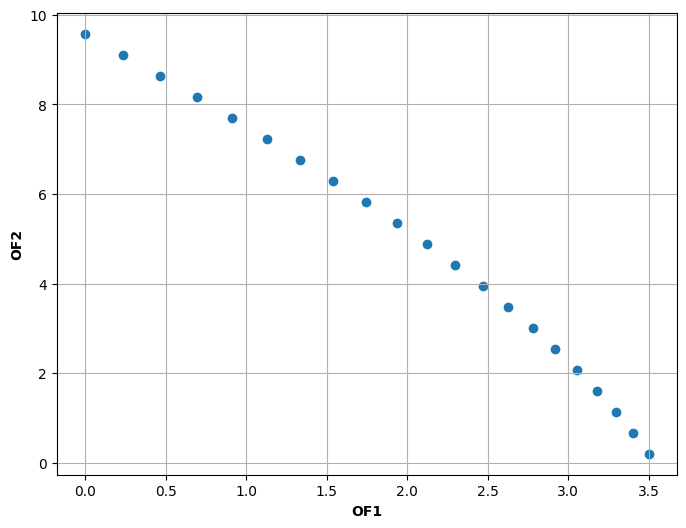

In [33]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('OF1',fontweight='bold')
plt.ylabel('OF2',fontweight='bold')
plt.grid()
plt.show()

# Epsilon Constraint

Reference: [1] https://www.linkedin.com/pulse/multi-objective-optimization-pyomo-alireza-soroudi/

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt

model = ConcreteModel()
model.epsilon=Param(initialize=10000,mutable=True)
model.x1 = Var(bounds=(1,2))
model.x2 = Var(bounds=(1,3))
model.OF1= Var(within=NonNegativeReals)
model.OF2= Var(within=NonNegativeReals)
model.eq1= Constraint(expr= model.OF2==-1.2*model.x1**2+5*model.x2)
model.eq2= Constraint(expr= model.OF2<=model.epsilon)
model.eq3= Constraint(expr= model.OF1==2*model.x1-0.5*model.x2**2)
model.obj1 = Objective(expr=model.OF1, sense=maximize)
model.obj2 = Objective(expr=model.OF2, sense=maximize)

In [ ]:
opt = SolverFactory('ipopt', executable='/content/ipopt')
model.obj2.deactivate()
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
maxOF1=value(model.obj1)
minOF2=value(model.obj2)

x1 =  2.0
x2 =  1.0
obj1 =  3.5
obj2 =  0.2


In [ ]:
model.obj1.deactivate()
model.obj2.activate()
results = opt.solve(model) # solves and updates instance
print('x1 = ',round(value(model.x1),2))
print('x2 = ',round(value(model.x2),2))
print('obj1 = ',round(value(model.obj1),2))
print('obj2 = ',round(value(model.obj2),2))
minOF1=value(model.obj1)
maxOF2=value(model.obj2)

x1 =  1.63
x2 =  2.55
obj1 =  0.0
obj2 =  9.58


In [ ]:
Nsteps=21
X=[]
Y=[]
print('  x1  ',' x2 ',' OF1 ',' OF2 ',' Epsilon ')
for counter in range(1,Nsteps+1):
    model.epsilon=minOF2+(maxOF2-minOF2)*(counter-1)/(Nsteps-1)
    results = opt.solve(model) # solves and updates instance
    print("%5.2f"% value(model.x1),"%5.2f"% value(model.x2),"%5.2f"% value(model.obj1),"%5.2f"% value(model.obj2), "%5.2f"% value(model.epsilon))
    X.append(value(model.obj1))
    Y.append(value(model.obj2))

  x1    x2   OF1   OF2   Epsilon 
 2.00  1.00  3.50  0.20  0.20
 1.95  1.05  3.36  0.67  0.67
 1.90  1.10  3.20  1.14  1.14
 1.86  1.15  3.06  1.61  1.61
 1.82  1.21  2.91  2.08  2.08
 1.78  1.27  2.75  2.54  2.54
 1.74  1.33  2.60  3.01  3.01
 1.71  1.40  2.44  3.48  3.48
 1.68  1.47  2.28  3.95  3.95
 1.65  1.54  2.12  4.42  4.42
 1.63  1.61  1.95  4.89  4.89
 1.61  1.69  1.78  5.36  5.36
 1.59  1.77  1.61  5.83  5.83
 1.57  1.85  1.43  6.30  6.30
 1.56  1.94  1.24  6.77  6.77
 1.55  2.02  1.05  7.23  7.23
 1.54  2.11  0.85  7.70  7.70
 1.53  2.20  0.65  8.17  8.17
 1.53  2.29  0.44  8.64  8.64
 1.53  2.39  0.22  9.11  9.11
 1.63  2.55  0.00  9.58  9.58


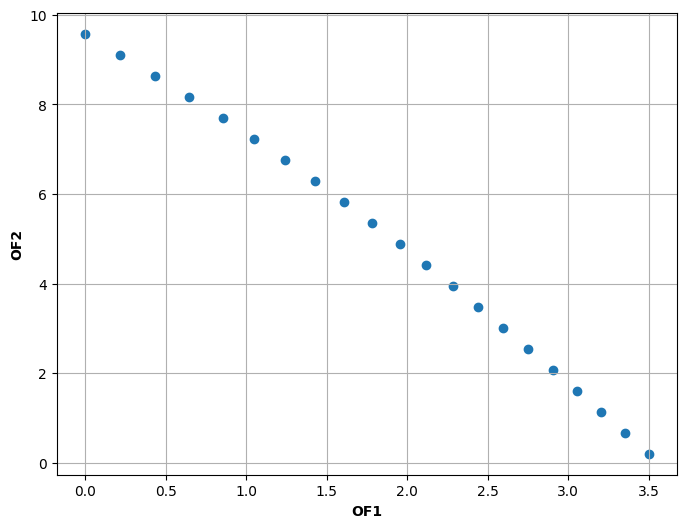

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('OF1',fontweight='bold')
plt.ylabel('OF2',fontweight='bold')
plt.grid()
plt.show()